In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Explore Database

In [6]:
# Inspect tables names 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
#  Inspect colunmns names of table measurement
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Inspect colunmns names of table station
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Inspect the first 5 rows of table measureme
engine.execute('SELECT * FROM measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
# Inspect the first 5 rows of table station
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Reflect Database and Create Session

In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found (similar to get_tables above)
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Query and Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results using the DataFrame plot method. 


In [15]:
# Get the 1st month and 12 months earlier

end_month = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
end_month = dt.date.fromisoformat(end_month[0])

start_month = end_month - timedelta(days=365)

print('Start_month:', start_month)
print('End_month:', end_month)


Start_month: 2016-08-23
End_month: 2017-08-23


In [16]:
# Query the last 12 months of precipitation data and order in desc order by date
prcp_12mths_data = session.query(Measurement.date, Measurement.prcp)\
                        .filter(Measurement.date >= start_month)\
                        .order_by(Measurement.date.desc()).all()
prcp_12mths_data

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [17]:
# Unpack the tuples using list comprehension, Select only the date and prcp values.
date = [date[0] for date in prcp_12mths_data]
prcp = [prcp[1] for prcp in prcp_12mths_data ]

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_12mths_df = pd.DataFrame({
                      
                         "Date": date,
                         "Precipitation": prcp
                         
                            })
prcp_12mths_df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [18]:
# Convert Date from object to datetime
# prcp_data_df['Date'] = pd.to_datetime(prcp_data_df['Date'], format='%Y-%m-%d')

In [19]:
# Set the index to the date column
prcp_12mths_df.set_index('Date', inplace=True)

# Export query to CSV
prcp_12mths_df.to_csv('prcp_12mths_data.csv')

prcp_12mths_df

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


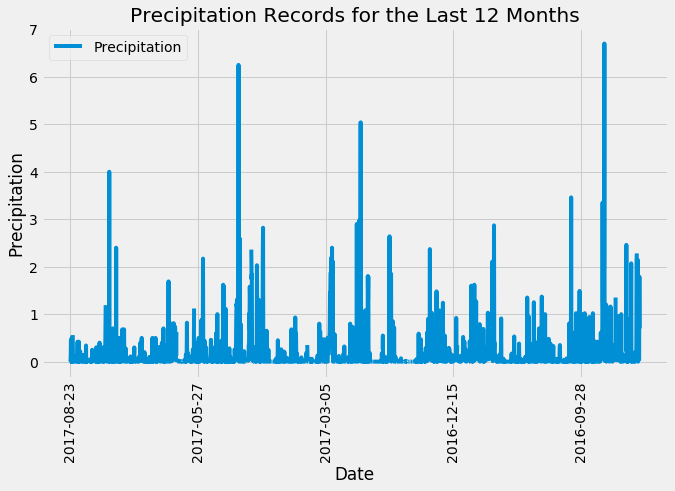

In [20]:
# Plot the results using the DataFrame Plotting with Matplotlib
prcp_12mths_df.plot(rot=90, figsize = (10,6), grid= True)

plt.title('Precipitation Records for the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_12mths_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [23]:
# Read sql to Dataframe directly
stmt = session.query(Measurement).statement
measurement_df =  pd.read_sql_query(stmt,session.bind)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station))\
        .group_by(Measurement.station)\
        .order_by(func.count(Measurement.station).desc()).all()

#According to the results, USC00519281 is the most active station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query
#calculate the lowest temperature recorded of the most active station

lowest_temp =  session.query(func.min(Measurement.tobs))\
       .filter(Measurement.station == 'USC00519281')\
       .all()

lowest_temp[0][0]

54.0

In [26]:
#calculate the highest temperature recorded of the most active station
highest_temp =  session.query(func.max(Measurement.tobs))\
       .filter(Measurement.station == 'USC00519281')\
       .all()

highest_temp[0][0]

85.0

In [27]:
#calculate the average temperature recorded of the most active station
avg_temp =  session.query(func.avg(Measurement.tobs))\
       .filter(Measurement.station == 'USC00519281')\
       .all()

round(avg_temp[0][0],1)

71.7

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
highest_obs_station_12mths_data = session.query(Measurement.tobs)\
       .order_by(Measurement.date.desc())\
       .filter(Measurement.date >= start_month).filter(Measurement.station == 'USC00519281')\
       .all() 

highest_obs_station_12mths_data

[(79.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (83.0),
 (82.0),
 (77.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (75.0),
 (77.0),
 (75.0),
 (82.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (74.0),
 (74.0),
 (72.0),
 (69.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (78.0),
 (76.0),
 (81.0),
 (79.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (71.0),
 (77.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (75.0),
 (79.0),
 (73.0),
 (75.0),
 (74.0),
 (76.0),
 (74.0),
 (74.0),
 (74.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (80.0),
 (75.0),
 (72.0),
 (74.0),
 (80.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (76.0),
 (68.0),
 (69.0),
 (74.0),
 (74.0),
 (74.0),
 (77.0),
 (76.0),
 (75.0),
 (70.0),
 (74.0),
 (67.0),
 (70.0),
 (75.0),
 (79.0),
 (70.0),
 (75.0),
 (70.0),
 (75.0),
 (65.0),
 (60.0),
 (72.0),
 (67.0),
 (70.0),
 (74.0),
 (72.0),
 (68.0),
 (76.0),
 (72.0),
 (69.0),
 

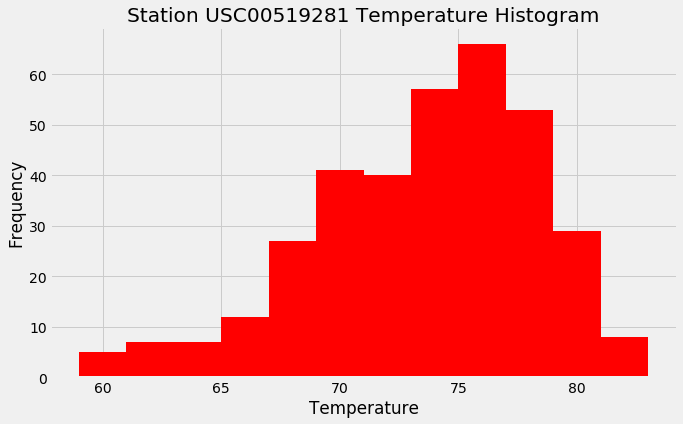

In [29]:
 # Plot the results as a histogram

temp = [temp[0] for temp in highest_obs_station_12mths_data]

plt.figure(figsize=(10,6))
plt.hist(temp, align='mid', color='red', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Station USC00519281 Temperature Histogram')
plt.show()

In [39]:
session.commit()
session.close()

## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
